In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.preprocessing import OneHotEncoder
from sklearn.preprocessing import MinMaxScaler

from sklearn.linear_model import LinearRegression
from sklearn.svm import SVR
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.decomposition import PCA
%run -i ../tools/label_encoder.py
%matplotlib inline

In [2]:
data_2000_1 = pd.read_csv('../DatosFTPICFES/SABER11/SB11-BASES_DE_DATOS/READY/2000_1.csv', delimiter=';')

In [3]:
data_2000_1.shape

(77508, 53)

In [4]:
y_list = ['PUNT_BIOLOGIA', 'PUNT_MATEMATICAS', 'PUNT_FILOSOFIA', 'PUNT_FISICA', 'PUNT_HISTORIA', 'PUNT_QUIMICA', 
          'PUNT_LENGUAJE', 'PUNT_GEOGRAFIA', 'PUNT_INTERDISCIPLINAR', 'PUNT_IDIOMA']
X_list = data_2000_1.columns.difference(y_list)

The first thing is encode the Main Dataframe, and change the NaN values

In [5]:
data_2000_1 = label_encoder(data_2000_1)

Before everything i want to see a correlation matrix

In [11]:
data_2000_1.corr().head()

,COLE_COD_ICFES,IND_ANNO_TERMINO_BACHILLERATO,COLE_JORNADA,COLE_VALOR_PENSION,ESTU_GENERO,ESTU_NACIMIENTO_DIA,ESTU_NACIMIENTO_MES,ESTU_NACIMIENTO_ANNO,ESTU_DEPTO_PRESENTACION,ESTU_MCPIO_PRESENTACION,...,FAMI_SOST_PERSONAL,ESTU_TRABAJA,ESTU_ACT_PROX_ANNO,COLE_CALENDARIO,COLE_BILINGUE,COLE_CARACTER,COLE_DEPTO_UBICACION,COLE_MCPIO_UBICACION,ESTU_RESIDE_DEPTO,ESTU_RESIDE_MCPIO
COLE_COD_ICFES,1.000000,-0.101185,0.272025,-0.141968,0.017179,-0.002482,0.002721,1.000000,-0.176448,-0.133658,...,-0.243568,0.181302,0.172591,0.429256,0.128176,0.036787,-0.166963,-0.128147,-0.176448,-0.119259
IND_ANNO_TERMINO_BACHILLERATO,-0.101185,1.000000,-0.047527,0.017702,0.001972,0.001758,-0.008307,-0.101185,0.117187,0.032225,...,0.103314,-0.079432,-0.037375,-0.169900,0.024079,0.073458,0.118315,0.022783,0.117187,0.024897
COLE_JORNADA,0.272025,-0.047527,1.000000,-0.060138,-0.019306,-0.001835,0.000742,0.272025,-0.079192,-0.020065,...,-0.123395,0.149411,0.126346,0.155260,0.753042,-0.018853,-0.079154,0.003125,-0.079192,-0.008053
COLE_VALOR_PENSION,-0.141968,0.017702,-0.060138,1.000000,0.016391,-0.001688,0.001032,-0.141968,-0.103451,0.089264,...,0.046190,-0.048149,-0.090842,-0.096407,-0.027956,-0.124092,-0.110953,0.094796,-0.103451,0.092353
ESTU_GENERO,0.017179,0.001972,-0.019306,0.016391,1.000000,0.000695,-0.001337,0.017179,-0.002232,-0.008575,...,-0.020356,0.046124,-0.021820,-0.001458,-0.012376,-0.010248,-0.003099,-0.003820,-0.002232,-0.005649


Here i can split the Dataframe into two sets **X** and **Y**

In [6]:
X = data_2000_1.filter(items=X_list)
Y = data_2000_1.filter(items=y_list)

Now i can split the **X** into a train set and a test set, and the same for the **y**

In [7]:
X_train = X.loc[:(X.shape[0]*.8), :]
X_test = X.loc[(X.shape[0]*.8):, :]

In [8]:
y_train = Y.loc[:(X.shape[0]*.8), :]
y_test = Y.loc[(X.shape[0]*.8):, :]

Since the images shows, the signal to predict is so chaotic, so maybe a linear regression will not be able to get a good prediction.

Now i can create the predictor

In [ ]:
plt.figure(figsize=(20,3))
plt.plot(Y);

<span style='color: blue;'>I'm checking if a classification could be possible</span>

In [ ]:
for i in Y:
    print(Y[i].value_counts().shape)

There are a lot of classes in each column... this will stand right here to be checked later

### Linear Regression of SKLearn

In [9]:
LR = LinearRegression()

In [10]:
LR.fit(X_train, y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=1, normalize=False)

In [11]:
LR.score(X_test, y_test)

-0.015548096263362019

### SVR

the svr requires an input with just one column in the *y* side

### Decision Tree Regressor  


In [ ]:
Tree = DecisionTreeRegressor()
Tree.fit(X_train, y_train)

In [ ]:
Tree.score(X_test, y_test)

### Random Forest Regressor

In [ ]:
RFR = RandomForestRegressor()

In [ ]:
RFR.fit(X_train, y_train)

In [ ]:
RFR.score(X_test, y_test)

Now, i will try to predict with this linear regressor and others in each subject

# Biologia

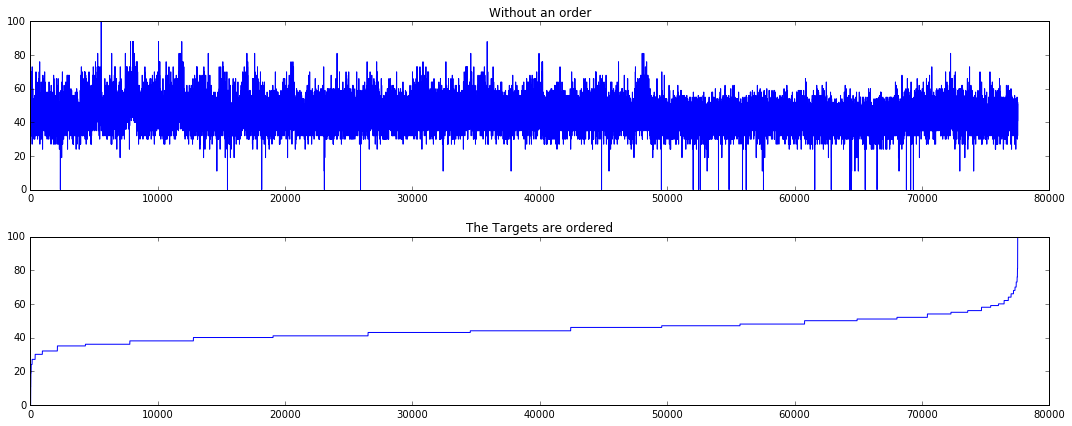

In [46]:
plt.figure(figsize=(15,6))
plt.subplot(2,1,1)
plt.plot(Y['PUNT_BIOLOGIA'])
plt.title('Without an order')
plt.subplot(2,1,2)
plt.plot(range(Y.shape[0]), Y['PUNT_BIOLOGIA'].sort_values())
plt.title('The Targets are ordered')
plt.tight_layout(h_pad=2)

### SKL Linear Regressor

In [51]:
LR_Bio = LinearRegression()
LR_Bio.fit(X_train, y_train['PUNT_BIOLOGIA'])
LR_Bio.score(X_test, y_test['PUNT_BIOLOGIA'])

-0.042026011797959617

In [38]:
LR_Bio.score(X_train, y_train['PUNT_BIOLOGIA'])

0.23642076261353662

In [96]:
OR_data_2000_1 = data_2000_1.sort_values('PUNT_BIOLOGIA', axis=0)
O_X = data_2000_1.filter(items=X_list)
O_Y = data_2000_1.filter(items=y_list)
f = int(O_X.shape[0]*.8) #'Tamaño a tomar (80% de los datos):'
O_X_train = O_X.iloc[:f, :]
O_X_test = O_X.iloc[f:, :]
O_y_train = O_Y.iloc[:f, :]
O_y_test = O_Y.iloc[f:, :]

Here is happening something strange... anything change, but the score improved.

In [71]:
LR_Bio = LinearRegression()
LR_Bio.fit(O_X_train, O_y_train['PUNT_BIOLOGIA'])
LR_Bio.score(O_X_test, O_y_test['PUNT_BIOLOGIA'])

-0.036583635150875489

In [72]:
LR_Bio.score(O_X_train, O_y_train['PUNT_BIOLOGIA'])

0.23642640082547184

HERE THE DF WAS ORDERED

In [82]:
OR_data_2000_1 = data_2000_1.sort_values('PUNT_BIOLOGIA', axis=0)
O_X = OR_data_2000_1.filter(items=X_list)
O_Y = OR_data_2000_1.filter(items=y_list)
f = int(O_X.shape[0]*.8) #'Tamaño a tomar (80% de los datos):'
O_X_train = O_X.iloc[:f, :]
O_X_test = O_X.iloc[f:, :]
O_y_train = O_Y.iloc[:f, :]
O_y_test = O_Y.iloc[f:, :]

In [74]:
LR_Bio = LinearRegression()
LR_Bio.fit(O_X_train, O_y_train['PUNT_BIOLOGIA'])
LR_Bio.score(O_X_test, O_y_test['PUNT_BIOLOGIA'])

-5.3029736351604804

In [75]:
LR_Bio.score(O_X_train, O_y_train['PUNT_BIOLOGIA'])

0.044538685974960579

#### Trying with a PCA

In [113]:
pca = PCA(n_components=20)
Xp = pca.fit_transform(X)
Xp_train = Xp[:int(Xp.shape[0]*0.8),:]
Xp_test = Xp[int(Xp.shape[0]*0.8):,:]

In [114]:
LR_Bio.fit(Xp_train, y_train['PUNT_BIOLOGIA'])
LR_Bio.score(Xp_test, y_test['PUNT_BIOLOGIA'])

ValueError: Found arrays with inconsistent numbers of samples: [62006 62007]

In [97]:
pca = PCA(n_components=20)
Xp = pca.fit_transform(O_X)
Xp_train = Xp[:int(Xp.shape[0]*0.8),:]
Xp_test = Xp[int(Xp.shape[0]*0.8):,:]

In [98]:
LR_Bio.fit(Xp_train, O_y_train['PUNT_BIOLOGIA'])
LR_Bio.score(Xp_test, O_y_test['PUNT_BIOLOGIA'])

-0.019905882682468956

In [99]:
LR_Bio.score(Xp_train, O_y_train['PUNT_BIOLOGIA'])

0.22322038658610274

## Polynomial Regression

In [ ]:
from sklearn.preprocessing import PolynomialFeatures

In [ ]:
Pol = PolynomialFeatures(degree=3)

In [ ]:
Xpol_train = Pol.fit_transform(X_train)

In [ ]:
new_X_train = pd.DataFrame(Xpol_train)

In [ ]:
new_X_train.head()

In [ ]:
PR = LinearRegression()
PR.fit(new_X_train, y_train['PUNT_BIOLOGIA'])

In [ ]:
Xpol_test = Pol.fit_transform(X_test)

In [ ]:
PR.score(Xpol_test, y_test['PUNT_BIOLOGIA'])

### SVR  
Here we have to scale the data before the training and testing

In [ ]:
scaler_X = MinMaxScaler(feature_range=(0,1))
scaler_y = MinMaxScaler(feature_range=(0,1))

In [ ]:
Xs_train = scaler_X.fit_transform(X_train)
ys_train = scaler_y.fit_transform(np.asarray(y_train['PUNT_BIOLOGIA']).reshape(-1,1))

In [ ]:
svr_bio = SVR()
svr_bio.fit(Xs_train, np.asarray(ys_train).reshape(ys_train.shape[0],))#se cambian las dimensiones del Y 
#porque la funcion las requiere

In [ ]:
scaler_Xt = MinMaxScaler(feature_range=(0,1))
scaler_yt = MinMaxScaler(feature_range=(0,1))
Xs_test = scaler_Xt.fit_transform(X_test)
ys_test = scaler_yt.fit_transform(np.asarray(y_test['PUNT_BIOLOGIA']).reshape(-1,1))

In [ ]:
svr_bio.score(Xs_test, ys_test)

#### With PCA

### Decision Tree Regressor

In [18]:
Bio_Tree = DecisionTreeRegressor()
Bio_Tree.fit(X_train, y_train['PUNT_BIOLOGIA'])
Bio_Tree.score(X_test, y_test['PUNT_BIOLOGIA'])

-5.9928745707380635

#### With PCA

In [19]:
Bio_Tree.fit(Xp_train, y_train['PUNT_BIOLOGIA'])
Bio_Tree.score(Xp_test, y_test['PUNT_BIOLOGIA'])

-6.0133171703136332

In [21]:
import math

In [ ]:
range(math.ceil(X.shape[0]*0.8), X.shape[0])[0:5000]

In [ ]:
62101-77626

In [ ]:
Bio_Tree.predict(Xp_test)[4001:]

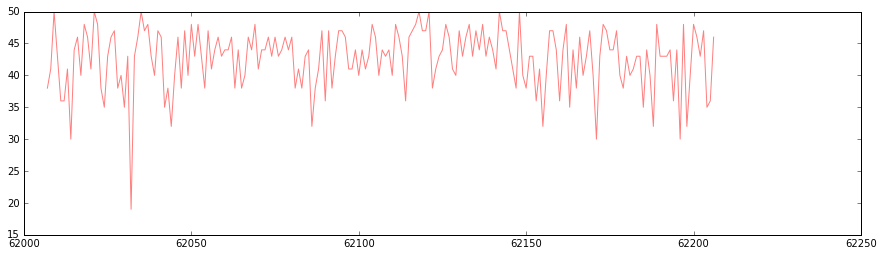

In [26]:
plt.figure(figsize=(15,4))
xl = range(math.ceil(X.shape[0]*0.8), X.shape[0])
plt.plot(xl[0:200], y_test['PUNT_BIOLOGIA'][0:200], alpha=0.5, color='blue');
plt.plot(xl[0:200], Bio_Tree.predict(Xp_test)[0:200], alpha=0.5, color='red');

### Random Forest Regressor

In [27]:
Bio_RFR = RandomForestRegressor()
Bio_RFR.fit(X_train, y_train['PUNT_BIOLOGIA'])
Bio_RFR.score(X_test, y_test['PUNT_BIOLOGIA'])

-5.3027059462852355

#### With PCA

In [ ]:
Bio_RFR.fit(Xp_train, y_train['PUNT_BIOLOGIA'])
Bio_RFR.score(Xp_test, y_test['PUNT_BIOLOGIA'])

# Matematicas

In [9]:
data_2000_1 = data_2000_1.sort_values('PUNT_MATEMATICAS', axis=0)
X = data_2000_1.filter(items=X_list)
Y = data_2000_1.filter(items=y_list)
f = int(X.shape[0]*.8) #'Tamaño a tomar (80% de los datos):'
X_train = X.iloc[:f, :]
X_test = X.iloc[f:, :]
y_train = Y.iloc[:f, :]
y_test = Y.iloc[f:, :]

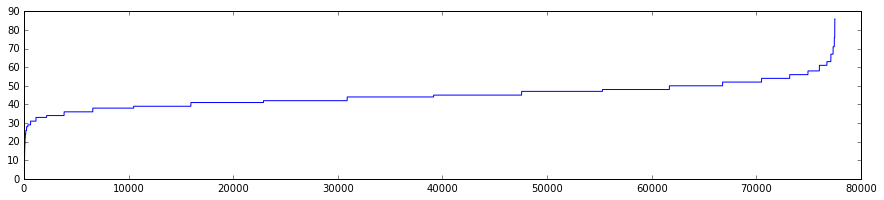

In [11]:
plt.figure(figsize=(15,3))
plt.plot(range(Y['PUNT_MATEMATICAS'].shape[0]), Y['PUNT_MATEMATICAS'])

### SKL Linear Regressor

In [12]:
LR_Mat = LinearRegression()
LR_Mat.fit(X_train, y_train['PUNT_MATEMATICAS'])
LR_Mat.score(X_test, y_test['PUNT_MATEMATICAS'])

-6.1392415294346421

#### With PCA

In [15]:
LR_Mat.fit(Xp_train, y_train['PUNT_MATEMATICAS'])
LR_Mat.score(Xp_test, y_test['PUNT_MATEMATICAS'])

-6.1392415294346421

### SVR

In [ ]:
svr_Math = SVR()
svr_Math.fit(X_train, y_train['PUNT_MATEMATICAS'])
svr_Math.score(X_test, y_test['PUNT_MATEMATICAS'])

### Decision Tree Regressor

In [16]:
DTR_Math = DecisionTreeRegressor()
DTR_Math.fit(X_train, y_train['PUNT_MATEMATICAS'])
DTR_Math.score(X_test, y_test['PUNT_MATEMATICAS'])

-7.0831743065383606

#### With PCA

In [17]:
DTR_Math.fit(Xp_train, y_train['PUNT_MATEMATICAS'])
DTR_Math.score(Xp_test, y_test['PUNT_MATEMATICAS'])

-7.0939965849418893

### Random Forest Regressor

In [18]:
RFR_Math = RandomForestRegressor()
RFR_Math.fit(X_train, y_train['PUNT_MATEMATICAS'])
RFR_Math.score(X_test, y_test['PUNT_MATEMATICAS'])

-6.2136281111410199

#### With PCA

In [19]:
RFR_Math.fit(Xp_train, y_train['PUNT_MATEMATICAS'])
RFR_Math.score(Xp_test, y_test['PUNT_MATEMATICAS'])

-6.249588238363363

# Filosofia

In [20]:
data_2000_1 = data_2000_1.sort_values('PUNT_FILOSOFIA', axis=0)
X = data_2000_1.filter(items=X_list)
Y = data_2000_1.filter(items=y_list)
f = int(X.shape[0]*.8) #'Tamaño a tomar (80% de los datos):'
X_train = X.iloc[:f, :]
X_test = X.iloc[f:, :]
y_train = Y.iloc[:f, :]
y_test = Y.iloc[f:, :]

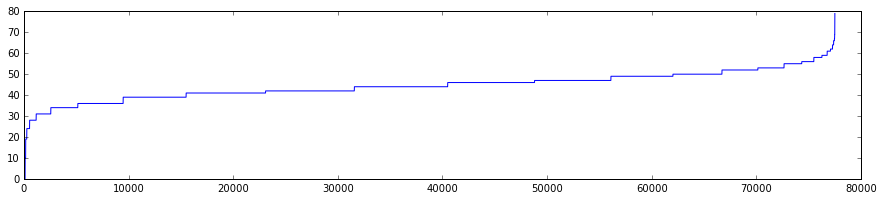

In [22]:
plt.figure(figsize=(15,3))
plt.plot(range(Y.shape[0]), Y['PUNT_FILOSOFIA'])

### SKL Linear Regressor

In [23]:
LR_Filo = LinearRegression()
LR_Filo.fit(X_train, y_train['PUNT_FILOSOFIA'])
LR_Filo.score(X_test, y_test['PUNT_FILOSOFIA'])

-9.3357580164652294

#### With PCA

In [24]:
LR_Filo.fit(Xp_train, y_train['PUNT_FILOSOFIA'])
LR_Filo.score(Xp_test, y_test['PUNT_FILOSOFIA'])

-9.3327588435452817

### Decision Tree Regressor

In [25]:
DTR_Filo = DecisionTreeRegressor()
DTR_Filo.fit(X_train, y_train['PUNT_FILOSOFIA'])
DTR_Filo.score(X_test, y_test['PUNT_FILOSOFIA'])

-11.900679707257103

#### With PCA

In [26]:
DTR_Filo.fit(Xp_train, y_train['PUNT_FILOSOFIA'])
DTR_Filo.score(Xp_test, y_test['PUNT_FILOSOFIA'])

-11.447231530799625

### Random Forest Regressor

In [27]:
RFR_Filo = RandomForestRegressor()
RFR_Filo.fit(X_train, y_train['PUNT_FILOSOFIA'])
RFR_Filo.score(X_test, y_test['PUNT_FILOSOFIA'])

-9.8525629380012614

#### With PCA

In [28]:
RFR_Filo.fit(Xp_train, y_train['PUNT_FILOSOFIA'])
RFR_Filo.score(Xp_test, y_test['PUNT_FILOSOFIA'])

-9.6007736965739543

# Fisica

In [ ]:
plt.figure(figsize=(15,3))
plt.plot(Y['PUNT_FISICA'])

### SKL Linear Regressor

In [ ]:
LR_Fis = LinearRegression()
LR_Fis.fit(X_train, y_train['PUNT_FISICA'])
LR_Fis.score(X_test, y_test['PUNT_FISICA'])

#### With PCA

In [ ]:
LR_Fis.fit(Xp_train, y_train['PUNT_FISICA'])
LR_Fis.score(Xp_test, y_test['PUNT_FISICA'])

### Decision Tree Regressor

In [ ]:
DTR_Math = DecisionTreeRegressor()
DTR_Math.fit(X_train, y_train['PUNT_FISICA'])
DTR_Math.score(X_test, y_test['PUNT_FISICA'])

#### With PCA

In [ ]:
DTR_Math.fit(Xp_train, y_train['PUNT_FISICA'])
DTR_Math.score(Xp_test, y_test['PUNT_FISICA'])

### Random Forest Regressor

In [ ]:
RFR_Math = RandomForestRegressor()
RFR_Math.fit(X_train, y_train['PUNT_FISICA'])
RFR_Math.score(X_test, y_test['PUNT_FISICA'])

#### With PCA

In [ ]:
RFR_Math.fit(Xp_train, y_train['PUNT_FISICA'])
RFR_Math.score(Xp_test, y_test['PUNT_FISICA'])

# Historia

In [ ]:
plt.figure(figsize=(15,3))
plt.plot(Y['PUNT_HISTORIA'])

### SKL Linear Regressor

In [ ]:
LR_Hist = LinearRegression()
LR_Hist.fit(X_train, y_train['PUNT_HISTORIA'])
LR_Hist.score(X_test, y_test['PUNT_HISTORIA'])

#### With PCA

In [ ]:
LR_Hist.fit(Xp_train, y_train['PUNT_HISTORIA'])
LR_Hist.score(Xp_test, y_test['PUNT_HISTORIA'])

### Decision Tree Regressor

In [ ]:
DTR_Hist = DecisionTreeRegressor()
DTR_Hist.fit(X_train, y_train['PUNT_HISTORIA'])
DTR_Hist.score(X_test, y_test['PUNT_HISTORIA'])

#### With PCA

In [ ]:
DTR_Hist.fit(Xp_train, y_train['PUNT_HISTORIA'])
DTR_Hist.score(Xp_test, y_test['PUNT_HISTORIA'])

### Random Forest Regressor

In [ ]:
RFR_Hist = RandomForestRegressor()
RFR_Hist.fit(X_train, y_train['PUNT_HISTORIA'])
RFR_Hist.score(X_test, y_test['PUNT_HISTORIA'])

#### With PCA

In [ ]:
RFR_Hist.fit(Xp_train, y_train['PUNT_HISTORIA'])
RFR_Hist.score(Xp_test, y_test['PUNT_HISTORIA'])

# Quimica

In [ ]:
plt.figure(figsize=(15,3))
plt.plot(Y['PUNT_QUIMICA'])

### SKL Linear Regressor

In [ ]:
LR_Qui = LinearRegression()
LR_Qui.fit(X_train, y_train['PUNT_QUIMICA'])
LR_Qui.score(X_test, y_test['PUNT_QUIMICA'])

#### With PCA

In [ ]:
LR_Qui.fit(Xp_train, y_train['PUNT_QUIMICA'])
LR_Qui.score(Xp_test, y_test['PUNT_QUIMICA'])

### Decision Tree Regressor

In [ ]:
DTR_Qui = DecisionTreeRegressor()
DTR_Qui.fit(X_train, y_train['PUNT_QUIMICA'])
DTR_Qui.score(X_test, y_test['PUNT_QUIMICA'])

#### With PCA

In [ ]:
DTR_Qui.fit(Xp_train, y_train['PUNT_QUIMICA'])
DTR_Qui.score(Xp_test, y_test['PUNT_QUIMICA'])

### Random Forest Regressor

In [ ]:
RFR_Qui = RandomForestRegressor()
RFR_Qui.fit(X_train, y_train['PUNT_QUIMICA'])
RFR_Qui.score(X_test, y_test['PUNT_QUIMICA'])

#### With PCA

In [ ]:
RFR_Qui.fit(Xp_train, y_train['PUNT_QUIMICA'])
RFR_Qui.score(Xp_test, y_test['PUNT_QUIMICA'])

# Lenguaje

In [ ]:
plt.figure(figsize=(15,3))
plt.plot(Y['PUNT_LENGUAJE'])

### SKL Linear Regressor

In [ ]:
LR_Len = LinearRegression()
LR_Len.fit(X_train, y_train['PUNT_LENGUAJE'])
LR_Len.score(X_test, y_test['PUNT_LENGUAJE'])

#### With PCA

In [ ]:
LR_Len.fit(Xp_train, y_train['PUNT_QUIMICA'])
LR_Len.score(Xp_test, y_test['PUNT_QUIMICA'])

### Decision Tree Regressor

In [ ]:
DTR_Len = DecisionTreeRegressor()
DTR_Len.fit(X_train, y_train['PUNT_LENGUAJE'])
DTR_Len.score(X_test, y_test['PUNT_LENGUAJE'])

#### With PCA

In [ ]:
DTR_Len.fit(Xp_train, y_train['PUNT_QUIMICA'])
DTR_Len.score(Xp_test, y_test['PUNT_QUIMICA'])

### Random Forest Regressor

In [ ]:
RFR_Len = RandomForestRegressor()
RFR_Len.fit(X_train, y_train['PUNT_LENGUAJE'])
RFR_Len.score(X_test, y_test['PUNT_LENGUAJE'])

#### With PCA

In [ ]:
RFR_Len.fit(Xp_train, y_train['PUNT_QUIMICA'])
RFR_Len.score(Xp_test, y_test['PUNT_QUIMICA'])

# Geografia

In [ ]:
plt.figure(figsize=(15,3))
plt.plot(Y['PUNT_GEOGRAFIA'])

### SKL Linear Regressor

In [ ]:
LR_Geo = LinearRegression()
LR_Geo.fit(X_train, y_train['PUNT_GEOGRAFIA'])
LR_Geo.score(X_test, y_test['PUNT_GEOGRAFIA'])

#### With PCA

In [ ]:
LR_Geo.fit(Xp_train, y_train['PUNT_GEOGRAFIA'])
LR_Geo.score(Xp_test, y_test['PUNT_GEOGRAFIA'])

### Decision Tree Regressor

In [ ]:
DTR_Geo = DecisionTreeRegressor()
DTR_Geo.fit(X_train, y_train['PUNT_GEOGRAFIA'])
DTR_Geo.score(X_test, y_test['PUNT_GEOGRAFIA'])

#### With PCA

In [ ]:
DTR_Geo.fit(Xp_train, y_train['PUNT_GEOGRAFIA'])
DTR_Geo.score(Xp_test, y_test['PUNT_GEOGRAFIA'])

### Random Forest Regressor

In [ ]:
RFR_Geo = RandomForestRegressor()
RFR_Geo.fit(X_train, y_train['PUNT_GEOGRAFIA'])
RFR_Geo.score(X_test, y_test['PUNT_GEOGRAFIA'])

#### With PCA

In [ ]:
RFR_Geo.fit(Xp_train, y_train['PUNT_GEOGRAFIA'])
RFR_Geo.score(Xp_test, y_test['PUNT_GEOGRAFIA'])

# Idioma

In [ ]:
plt.figure(figsize=(15,3))
plt.plot(Y['PUNT_IDIOMA'])

### SKL Linear Regressor

In [ ]:
LR_ID = LinearRegression()
LR_ID.fit(X_train, y_train['PUNT_IDIOMA'])
LR_ID.score(X_test, y_test['PUNT_IDIOMA'])

#### With PCA

In [ ]:
LR_ID.fit(Xp_train, y_train['PUNT_IDIOMA'])
LR_ID.score(Xp_test, y_test['PUNT_IDIOMA'])

### Decision Tree Regressor

In [ ]:
DTR_ID = DecisionTreeRegressor()
DTR_ID.fit(X_train, y_train['PUNT_IDIOMA'])
DTR_ID.score(X_test, y_test['PUNT_IDIOMA'])

#### With PCA

In [ ]:
DTR_ID.fit(Xp_train, y_train['PUNT_IDIOMA'])
DTR_ID.score(Xp_test, y_test['PUNT_IDIOMA'])

### Random Forest Regressor

In [ ]:
RFR_ID = RandomForestRegressor()
RFR_ID.fit(X_train, y_train['PUNT_IDIOMA'])
RFR_ID.score(X_test, y_test['PUNT_IDIOMA'])

#### With PCA

In [ ]:
RFR_ID.fit(Xp_train, y_train['PUNT_IDIOMA'])
RFR_ID.score(Xp_test, y_test['PUNT_IDIOMA'])

# Interdisciplinar

In [ ]:
plt.figure(figsize=(15,3))
plt.plot(Y['PUNT_INTERDISCIPLINAR'])

### SKL Linear Regressor

In [ ]:
LR_Int = LinearRegression()
LR_Int.fit(X_train, y_train['PUNT_INTERDISCIPLINAR'])
LR_Int.score(X_test, y_test['PUNT_INTERDISCIPLINAR'])

#### With PCA

In [ ]:
LR_Int.fit(Xp_train, y_train['PUNT_INTERDISCIPLINAR'])
LR_Int.score(Xp_test, y_test['PUNT_INTERDISCIPLINAR'])

### Decision Tree Regressor

In [ ]:
DTR_INT = DecisionTreeRegressor()
DTR_INT.fit(X_train, y_train['PUNT_INTERDISCIPLINAR'])
DTR_INT.score(X_test, y_test['PUNT_INTERDISCIPLINAR'])

#### With PCA

In [ ]:
DTR_INT.fit(Xp_train, y_train['PUNT_INTERDISCIPLINAR'])
DTR_INT.score(Xp_test, y_test['PUNT_INTERDISCIPLINAR'])

### Random Forest Regressor

In [ ]:
RFR_INT = RandomForestRegressor()
RFR_INT.fit(X_train, y_train['PUNT_INTERDISCIPLINAR'])
RFR_INT.score(X_test, y_test['PUNT_INTERDISCIPLINAR'])

#### With PCA

In [ ]:
RFR_INT.fit(Xp_train, y_train['PUNT_INTERDISCIPLINAR'])
RFR_INT.score(Xp_test, y_test['PUNT_INTERDISCIPLINAR'])

In [ ]:
l = [0, 2, 1, 4, 5]

In [ ]:
l = pd.DataFrame(l)

In [ ]:
coder = LabelEncoder()

In [ ]:
np.asarray(l).reshape((5,)).shape

In [ ]:
np.asarray(l).reshape(5,)

In [ ]:
new_l = coder.fit_transform(np.asarray(l).reshape((5,)))

In [ ]:
new_l

In [ ]:
Hot_1 = OneHotEncoder()

In [ ]:
Hotter = Hot_1.fit_transform(new_l.reshape(1, -1), ['numbers'])

In [ ]:
Hotter.toarray()